# Kaggle Project 10 - Wine Quality Prediction

## Prepared by: Dwaipayan Mukherjee (2211569 - AIA AIML)

## About the Project:-

**DATASET DESCRIPTION**

Here we will predict the quality of wine on the basis of given features. We use the wine quality dataset available on Internet for free. This dataset has the fundamental features which are responsible for affecting the quality of the wine. By the use of several Machine learning models, we will predict the quality of the wine..

**ATTRIBUTE DESCRIPTION**

**fixed acidity** : Primary fixed acids found in wine are tartaric, succinic, citric, and malic.

**volatile acidity**: Gaseous acids present in wine.

**citric acid** : It is weak organic acid, found in citrus fruits naturally.

**residual sugar**: Amount of sugar left after fermentation.

**chlorides** : Amount of salt present in wine.

**free sulfur dioxide** : So2 is used for prevention of wine by oxidation and microbial spoilage.

**total sulfur dioxide** : Total So2 in wine

**density** : Describes the density of the wine.

**pH** : pH is used for checking acidity

**sulphates** : Added sulfites preserve freshness and protect wine from oxidation, and bacteria.

**alcohol** : Percent of alcohol present in wine.



## 1. Necessary Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import LabelEncoder

## 2. Loading the data and performing EDA:

### 2.1 EDA on train data:

Loading the train data as Pandas dataframe:

In [3]:
df1=pd.read_csv("train.csv")

In [4]:
df1.head()

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            8.0              0.50         0.39             2.2   
1   1            9.3              0.30         0.73             2.3   
2   2            7.1              0.51         0.03             2.1   
3   3            8.1              0.87         0.22             2.6   
4   4            8.5              0.36         0.30             2.3   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.073                 30.0                  39.0  0.99572  3.33   
1      0.092                 30.0                  67.0  0.99854  3.32   
2      0.059                  3.0                  12.0  0.99660  3.52   
3      0.084                 11.0                  65.0  0.99730  3.20   
4      0.079                 10.0                  45.0  0.99444  3.20   

   sulphates  alcohol  quality  
0       0.77     12.1        6  
1       0.67     12.8        6  
2       0.73     11.3        7  
3       0.53      9.8        5  
4       1.36      9.5        6

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [6]:
df1.describe().T

count         mean         std      min       25%  \
Id                    2056.0  1027.500000  593.660397  0.00000  513.7500   
fixed acidity         2056.0     8.365175    1.705390  5.00000    7.2000   
volatile acidity      2056.0     0.527601    0.173164  0.18000    0.3900   
citric acid           2056.0     0.265058    0.188267  0.00000    0.0900   
residual sugar        2056.0     2.398881    0.858824  1.20000    1.9000   
chlorides             2056.0     0.081856    0.023729  0.01200    0.0710   
free sulfur dioxide   2056.0    16.955982   10.009710  1.00000    8.0000   
total sulfur dioxide  2056.0    49.236868   32.961141  7.00000   22.0000   
density               2056.0     0.996748    0.001827  0.99007    0.9956   
pH                    2056.0     3.310569    0.142321  2.74000    3.2000   
sulphates             2056.0     0.641308    0.137942  0.39000    0.5500   
alcohol               2056.0    10.414972    1.028825  8.70000    9.5000   
quality               2056.0     5.720817    0.853146  3.00000    5.0000   

                            50%        75%         max  
Id                    1027.5000  1541.2500  2055.00000  
fixed acidity            7.9500     9.2000    15.90000  
volatile acidity         0.5200     0.6400     1.58000  
citric acid              0.2500     0.4200     0.76000  
residual sugar           2.2000     2.6000    14.00000  
chlorides                0.0790     0.0900     0.41400  
free sulfur dioxide     16.0000    24.0000    68.00000  
total sulfur dioxide    44.0000    65.0000   289.00000  
density                  0.9967     0.9978     1.00369  
pH                       3.3100     3.3900     3.78000  
sulphates                0.6100     0.7200     1.95000  
alcohol                 10.1000    11.0000    14.00000  
quality                  6.0000     6.0000     8.00000

**Data Cleaning:-**

Checking for  duplicates values:

In [7]:
df1.duplicated().sum()

0

In [8]:
df1.head()

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            8.0              0.50         0.39             2.2   
1   1            9.3              0.30         0.73             2.3   
2   2            7.1              0.51         0.03             2.1   
3   3            8.1              0.87         0.22             2.6   
4   4            8.5              0.36         0.30             2.3   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.073                 30.0                  39.0  0.99572  3.33   
1      0.092                 30.0                  67.0  0.99854  3.32   
2      0.059                  3.0                  12.0  0.99660  3.52   
3      0.084                 11.0                  65.0  0.99730  3.20   
4      0.079                 10.0                  45.0  0.99444  3.20   

   sulphates  alcohol  quality  
0       0.77     12.1        6  
1       0.67     12.8        6  
2       0.73     11.3        7  
3       0.53      9.8        5  
4       1.36      9.5        6

Checking for null values

In [9]:
df1.isnull().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values or duplicate values in the train dataset.

**Data Visualization:-**

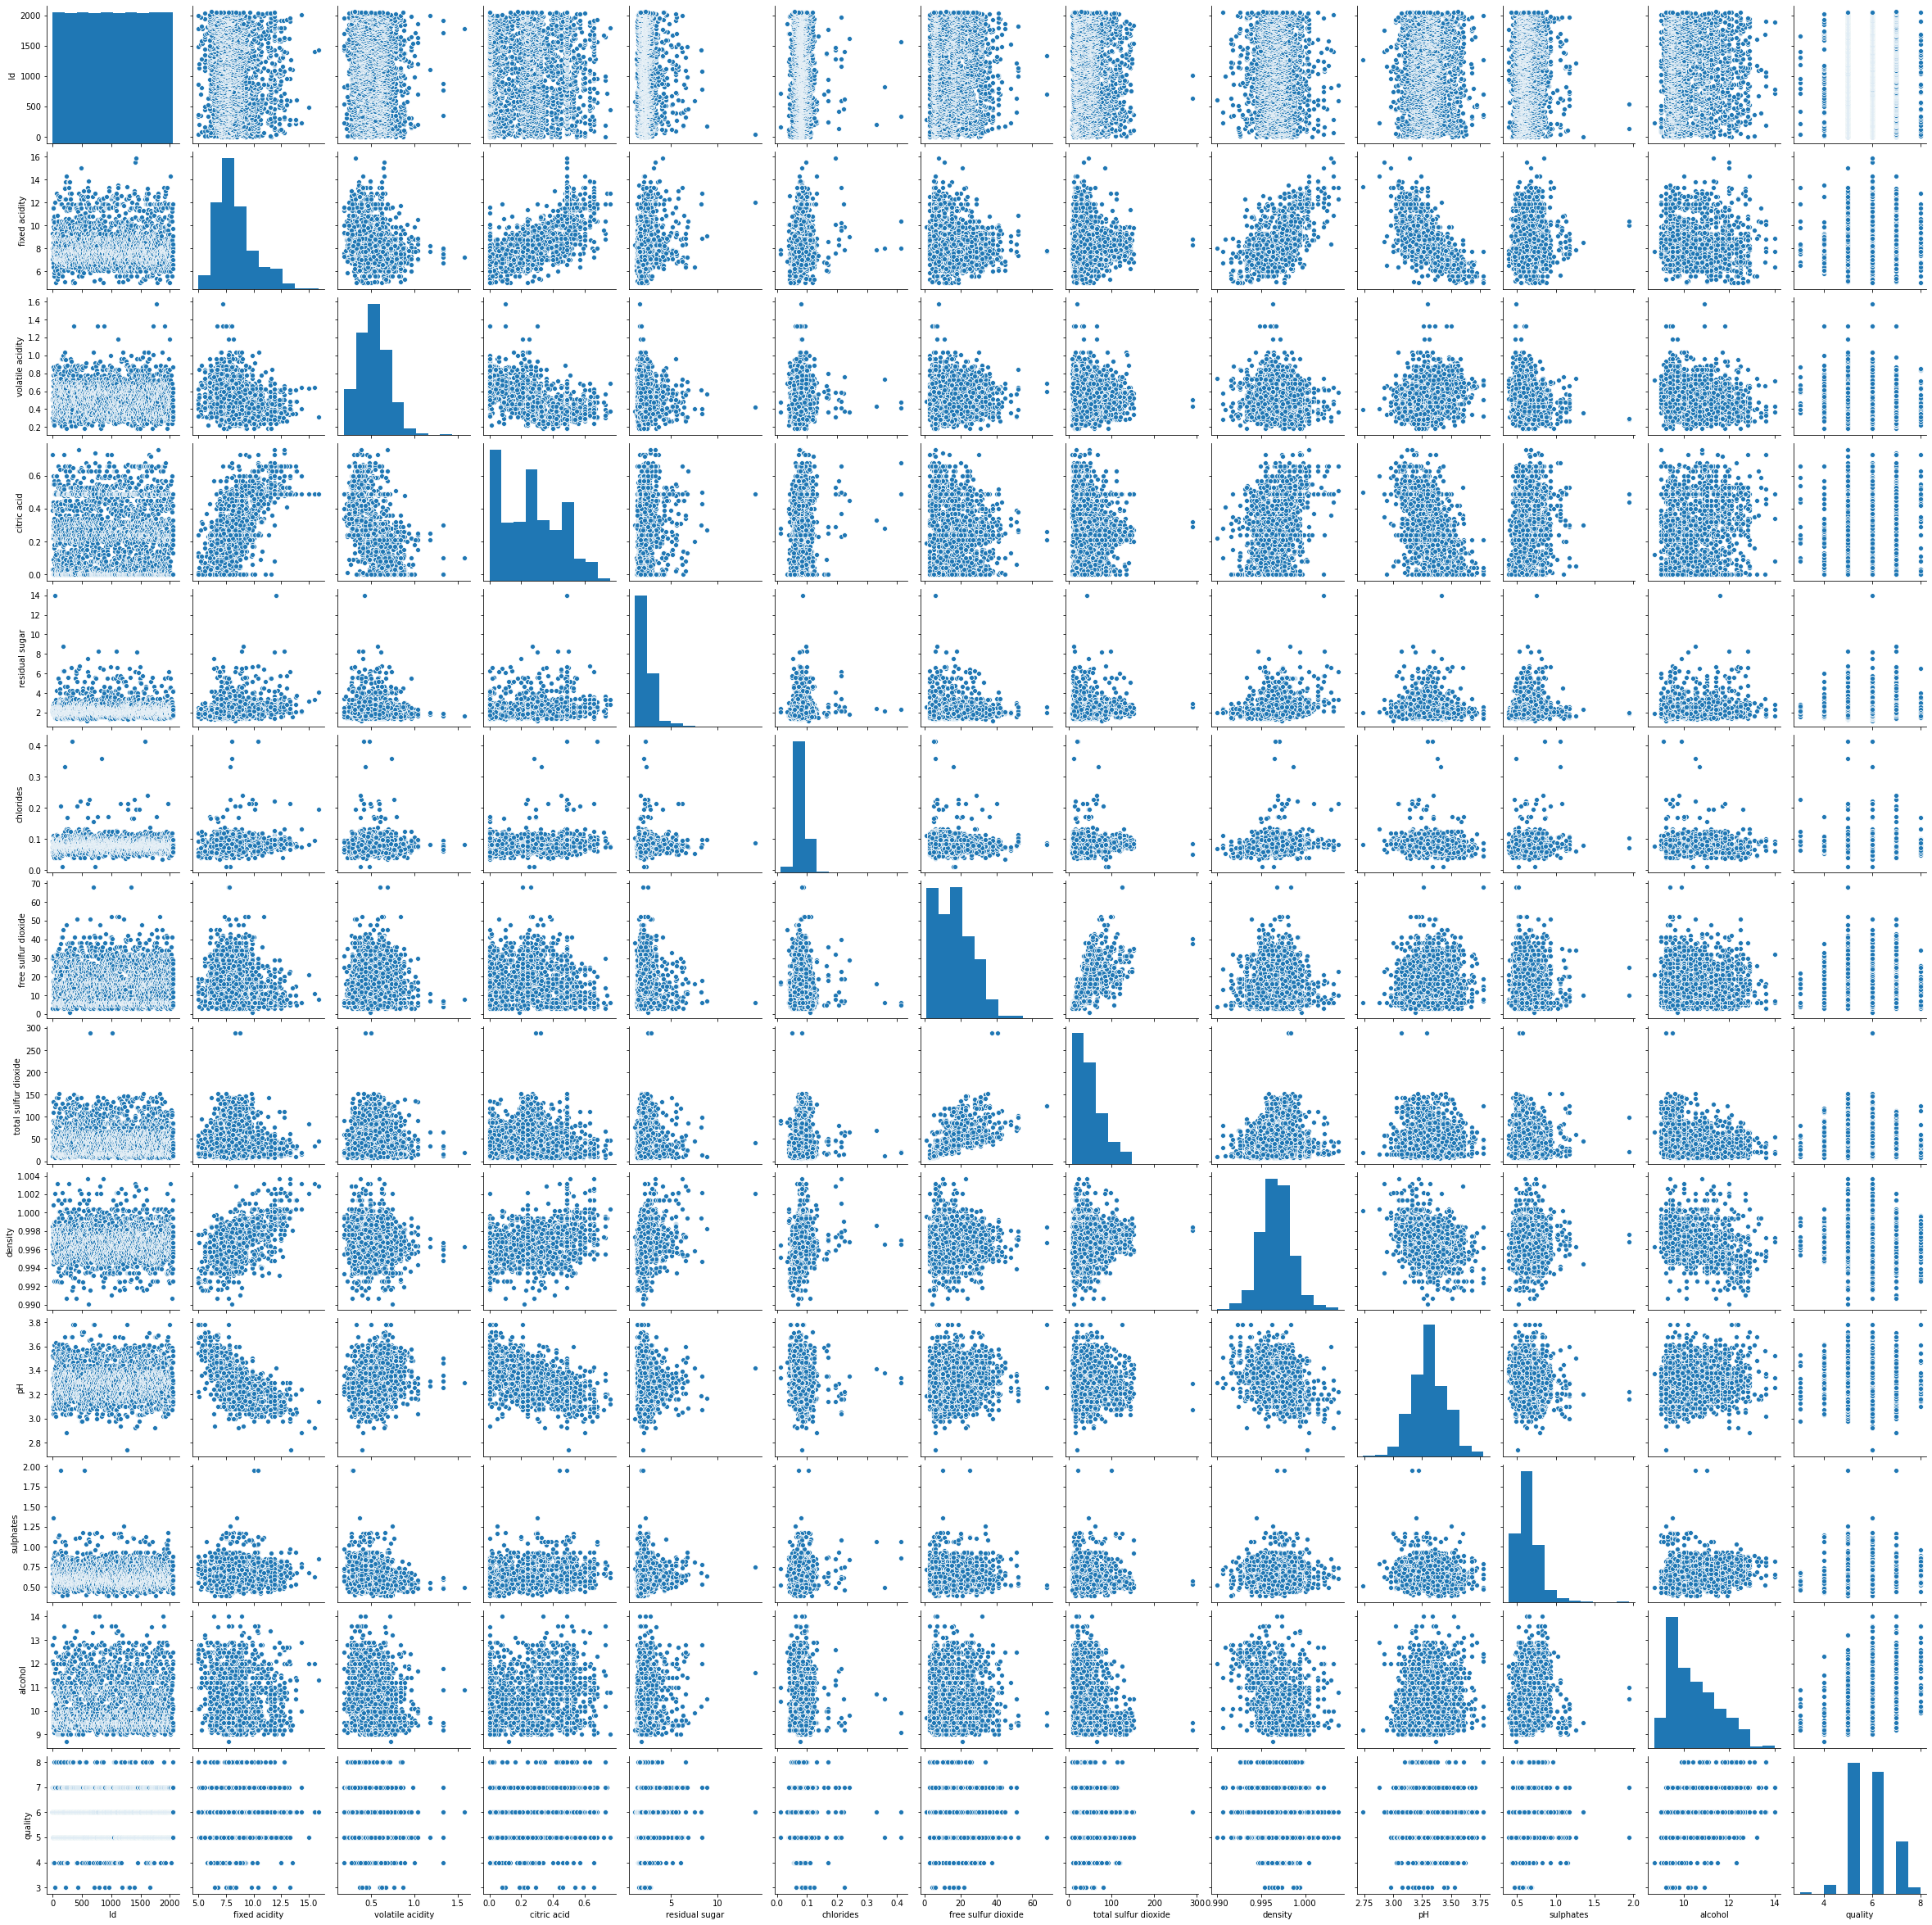

In [10]:
sns.pairplot(df1)

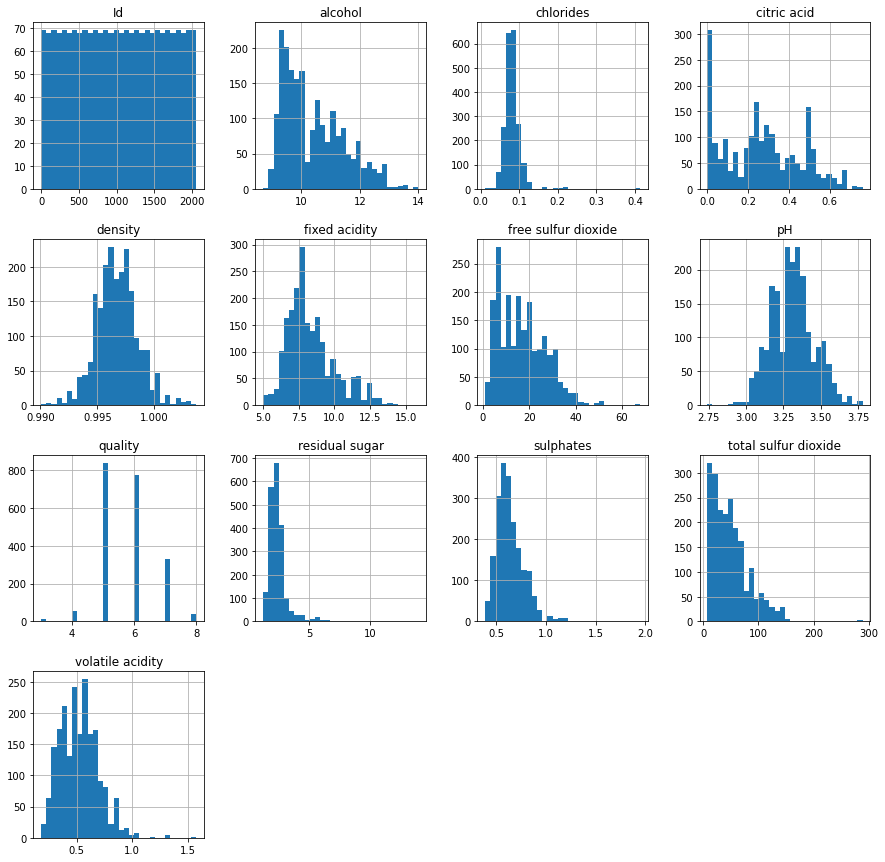

In [11]:
df1.hist(bins=30, figsize=(15,15))
plt.show()


Checking skewness of the features:

In [12]:
df1.skew()

Id                      0.000000
fixed acidity           0.959832
volatile acidity        0.668343
citric acid             0.246571
residual sugar          3.756802
chlorides               5.262627
free sulfur dioxide     0.681219
total sulfur dioxide    1.267906
density                 0.202606
pH                      0.216976
sulphates               1.802854
alcohol                 0.786872
quality                 0.266307
dtype: float64

**Dealing with outliers in the `residual sugar` column:**

If the value of `residual sugar` is greater than the 75th quantile, I have replaced the value with the 75th quantile. Similarly, if the value is less than the 25th quantile, I have replaced the value with the 25th quantile.

In [13]:
q1=df1["residual sugar"].quantile(0.25)
q2=df1["residual sugar"].quantile(0.75)

In [14]:
df1["residual sugar"]=np.where(df1["residual sugar"]<q1,q1,df1["residual sugar"])
df1["residual sugar"]=np.where(df1["residual sugar"]>q2,q2,df1["residual sugar"])

In [15]:
df1["residual sugar"].skew()

0.12883726939198975

**Few transformations:-**

I have taken log of values in `chloride` column, square root of the values in `total sulfur dioxide` column, log of values in the `sulphates` column, log of values in the `fixed acidity` column, log of values in the `alcohol` column, log of values in the `volatile acidity` column, and log of values in the `free sulfur dioxide` column.

In [16]:
df1["chlorides"]=np.log(df1["chlorides"])
df1["chlorides"].skew()

0.293513637420632

In [17]:
df1["total sulfur dioxide"]=np.sqrt(df1["total sulfur dioxide"])
df1["total sulfur dioxide"].skew()

0.44898299390719687

In [18]:
df1["sulphates"]=np.log(df1["sulphates"])
df1["sulphates"].skew()

0.6574934047357525

In [19]:
df1["fixed acidity"]=np.log(df1["fixed acidity"])
df1["fixed acidity"].skew()

0.44889138069225104

In [20]:
df1["alcohol"]=np.log(df1["alcohol"])
df1["alcohol"].skew()

0.6304639721110267

In [21]:
df1["volatile acidity"]=np.log(df1["volatile acidity"])
df1["volatile acidity"].skew()

-0.2763407797706401

In [22]:
df1["free sulfur dioxide"]=np.log(df1["free sulfur dioxide"])
df1["free sulfur dioxide"].skew()

-0.39816322843547336

In [23]:
df1.skew()

Id                      0.000000
fixed acidity           0.448891
volatile acidity       -0.276341
citric acid             0.246571
residual sugar          0.128837
chlorides               0.293514
free sulfur dioxide    -0.398163
total sulfur dioxide    0.448983
density                 0.202606
pH                      0.216976
sulphates               0.657493
alcohol                 0.630464
quality                 0.266307
dtype: float64

**Correlation:-**

In [24]:
corr=df1.corr()

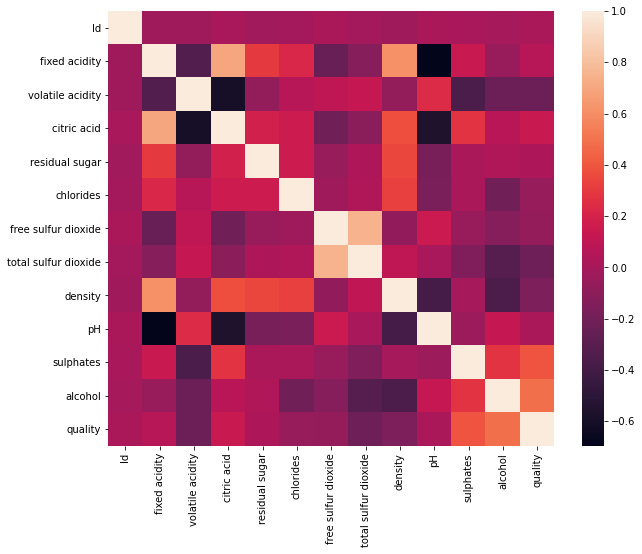

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(corr)
plt.show()

In [26]:
corr

Id  fixed acidity  volatile acidity  citric acid  \
Id                    1.000000      -0.021168         -0.025455     0.010262   
fixed acidity        -0.021168       1.000000         -0.331678     0.698346   
volatile acidity     -0.025455      -0.331678          1.000000    -0.591139   
citric acid           0.010262       0.698346         -0.591139     1.000000   
residual sugar       -0.016102       0.298606         -0.067395     0.191672   
chlorides            -0.004012       0.222004          0.069825     0.155228   
free sulfur dioxide   0.024568      -0.241479          0.100694    -0.208988   
total sulfur dioxide -0.012809      -0.121249          0.130172    -0.106908   
density              -0.022799       0.611695         -0.067991     0.376759   
pH                    0.016261      -0.696062          0.244143    -0.558444   
sulphates             0.012040       0.143833         -0.359439     0.276540   
alcohol               0.005596      -0.049203         -0.229429     0.078828   
quality               0.025684       0.065921         -0.228725     0.141797   

                      residual sugar  chlorides  free sulfur dioxide  \
Id                         -0.016102  -0.004012             0.024568   
fixed acidity               0.298606   0.222004            -0.241479   
volatile acidity           -0.067395   0.069825             0.100694   
citric acid                 0.191672   0.155228            -0.208988   
residual sugar              1.000000   0.157410            -0.051490   
chlorides                   0.157410   1.000000            -0.027467   
free sulfur dioxide        -0.051490  -0.027467             1.000000   
total sulfur dioxide        0.032105   0.044804             0.748879   
density                     0.346806   0.319711            -0.074378   
pH                         -0.177625  -0.168089             0.146622   
sulphates                   0.024141   0.012908            -0.046795   
alcohol                     0.039352  -0.200132            -0.122468   
quality                     0.031020  -0.057792            -0.061303   

                      total sulfur dioxide   density        pH  sulphates  \
Id                               -0.012809 -0.022799  0.016261   0.012040   
fixed acidity                    -0.121249  0.611695 -0.696062   0.143833   
volatile acidity                  0.130172 -0.067991  0.244143  -0.359439   
citric acid                      -0.106908  0.376759 -0.558444   0.276540   
residual sugar                    0.032105  0.346806 -0.177625   0.024141   
chlorides                         0.044804  0.319711 -0.168089   0.012908   
free sulfur dioxide               0.748879 -0.074378  0.146622  -0.046795   
total sulfur dioxide              1.000000  0.105424  0.008505  -0.150104   
density                           0.105424  1.000000 -0.388449   0.000122   
pH                                0.008505 -0.388449  1.000000  -0.038829   
sulphates                        -0.150104  0.000122 -0.038829   1.000000   
alcohol                          -0.317753 -0.355810  0.127888   0.274206   
quality                          -0.216142 -0.153198  0.016378   0.395046   

                       alcohol   quality  
Id                    0.005596  0.025684  
fixed acidity        -0.049203  0.065921  
volatile acidity     -0.229429 -0.228725  
citric acid           0.078828  0.141797  
residual sugar        0.039352  0.031020  
chlorides            -0.200132 -0.057792  
free sulfur dioxide  -0.122468 -0.061303  
total sulfur dioxide -0.317753 -0.216142  
density              -0.355810 -0.153198  
pH                    0.127888  0.016378  
sulphates             0.274206  0.395046  
alcohol               1.000000  0.486235  
quality               0.486235  1.000000

Label encoding the target column `quality`:

In [27]:
le = LabelEncoder()
df1['quality'] = le.fit_transform(df1['quality'])

In [28]:
df1['quality'].unique()

array([3, 4, 2, 1, 5, 0], dtype=int64)

**Preparing the training dataset:-**

In [29]:
X = df1.drop("quality",axis=1)

In [30]:
X

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0       2.079442         -0.693147         0.39             2.2   
1        1       2.230014         -1.203973         0.73             2.3   
2        2       1.960095         -0.673345         0.03             2.1   
3        3       2.091864         -0.139262         0.22             2.6   
4        4       2.140066         -1.021651         0.30             2.3   
...    ...            ...               ...          ...             ...   
2051  2051       1.887070         -1.171183         0.13             2.0   
2052  2052       2.272126         -0.527633         0.21             1.9   
2053  2053       2.041220         -0.843970         0.42             1.9   
2054  2054       2.208274         -0.693147         0.00             1.9   
2055  2055       1.824549         -1.171183         0.18             2.3   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0     -2.617296             3.401197              6.244998  0.99572  3.33   
1     -2.385967             3.401197              8.185353  0.99854  3.32   
2     -2.830218             1.098612              3.464102  0.99660  3.52   
3     -2.476938             2.397895              8.062258  0.99730  3.20   
4     -2.538307             2.302585              6.708204  0.99444  3.20   
...         ...                  ...                   ...      ...   ...   
2051  -2.882404             3.367296              6.480741  0.99388  3.52   
2052  -2.538307             3.295837              8.062258  0.99745  3.14   
2053  -2.645075             2.944439              6.082763  0.99258  3.32   
2054  -2.847312             1.609438              3.605551  0.99670  3.22   
2055  -2.830218             2.484907              5.291503  0.99520  3.56   

      sulphates   alcohol  
0     -0.261365  2.493205  
1     -0.400478  2.549445  
2     -0.314711  2.424803  
3     -0.634878  2.282382  
4      0.307485  2.251292  
...         ...       ...  
2051  -0.139262  2.484907  
2052  -0.544727  2.240710  
2053  -0.261365  2.525729  
2054  -0.867501  2.251292  
2055  -0.127833  2.433613  

[2056 rows x 12 columns]

Removing the irrelevant `Id` column:

In [31]:
X.drop('Id', axis=1, inplace=True)
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.079442         -0.693147         0.39             2.2  -2.617296   
1       2.230014         -1.203973         0.73             2.3  -2.385967   
2       1.960095         -0.673345         0.03             2.1  -2.830218   
3       2.091864         -0.139262         0.22             2.6  -2.476938   
4       2.140066         -1.021651         0.30             2.3  -2.538307   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             3.401197              6.244998  0.99572  3.33  -0.261365   
1             3.401197              8.185353  0.99854  3.32  -0.400478   
2             1.098612              3.464102  0.99660  3.52  -0.314711   
3             2.397895              8.062258  0.99730  3.20  -0.634878   
4             2.302585              6.708204  0.99444  3.20   0.307485   

    alcohol  
0  2.493205  
1  2.549445  
2  2.424803  
3  2.282382  
4  2.251292

In [32]:
y = df1.quality

In [33]:
y

0       3
1       3
2       4
3       2
4       3
       ..
2051    4
2052    2
2053    5
2054    2
2055    4
Name: quality, Length: 2056, dtype: int64

In [34]:
print("No. of unique classes: ", y.nunique())
print("Unique classes:", y.unique())

No. of unique classes:  6
Unique classes: [3 4 2 1 5 0]


### 2.2 EDA on test data:

**Data exploration:**

Loading the test dataset as a Pandas dataframe:

In [35]:
df2=pd.read_csv("test.csv")

In [36]:
df2.head()

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  2056            7.2             0.510         0.01             2.0   
1  2057            7.2             0.755         0.15             2.0   
2  2058            8.4             0.460         0.40             2.0   
3  2059            8.0             0.470         0.40             1.8   
4  2060            6.5             0.340         0.32             2.1   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.077                 31.0                  54.0  0.99748  3.39   
1      0.102                 14.0                  35.0  0.99586  3.33   
2      0.065                 21.0                  50.0  0.99774  3.08   
3      0.056                 14.0                  25.0  0.99480  3.30   
4      0.044                  8.0                  94.0  0.99356  3.23   

   sulphates  alcohol  
0       0.59      9.8  
1       0.68     10.0  
2       0.65      9.5  
3       0.65     11.7  
4       0.48     12.8

In [37]:
df2.shape

(1372, 12)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1372 non-null   int64  
 1   fixed acidity         1372 non-null   float64
 2   volatile acidity      1372 non-null   float64
 3   citric acid           1372 non-null   float64
 4   residual sugar        1372 non-null   float64
 5   chlorides             1372 non-null   float64
 6   free sulfur dioxide   1372 non-null   float64
 7   total sulfur dioxide  1372 non-null   float64
 8   density               1372 non-null   float64
 9   pH                    1372 non-null   float64
 10  sulphates             1372 non-null   float64
 11  alcohol               1372 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 128.8 KB


In [39]:
df2.describe()

Id  fixed acidity  volatile acidity  citric acid  \
count  1372.000000    1372.000000       1372.000000  1372.000000   
mean   2741.500000       8.369606          0.524311     0.270569   
std     396.206596       1.664694          0.176942     0.185731   
min    2056.000000       4.900000          0.120000     0.000000   
25%    2398.750000       7.100000          0.390000     0.110000   
50%    2741.500000       7.900000          0.500000     0.260000   
75%    3084.250000       9.100000          0.635000     0.420000   
max    3427.000000      15.600000          1.330000     0.760000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     1372.000000  1372.000000          1372.000000           1372.000000   
mean         2.415926     0.081307            17.162536             49.089286   
std          0.921155     0.026566             9.974082             32.803721   
min          1.300000     0.012000             1.000000              8.000000   
25%          2.000000     0.070000             8.000000             23.000000   
50%          2.200000     0.078000            16.000000             43.000000   
75%          2.500000     0.087000            24.000000             66.000000   
max          8.300000     0.467000            68.000000            165.000000   

           density           pH    sulphates      alcohol  
count  1372.000000  1372.000000  1372.000000  1372.000000  
mean      0.996670     3.312223     0.647267    10.473081  
std       0.001822     0.141405     0.134792     1.027170  
min       0.990070     2.740000     0.390000     8.800000  
25%       0.995380     3.210000     0.550000     9.600000  
50%       0.996600     3.310000     0.620000    10.200000  
75%       0.997800     3.390000     0.730000    11.200000  
max       1.003200     4.010000     1.620000    14.000000

**Data cleaning:**

Checking for duplicates

In [40]:
df2.duplicated().sum()

0

Checking for null values

In [41]:
df2.isnull().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

There are no null values and no duplicates in the test data as well.

**Data Visualization:-**

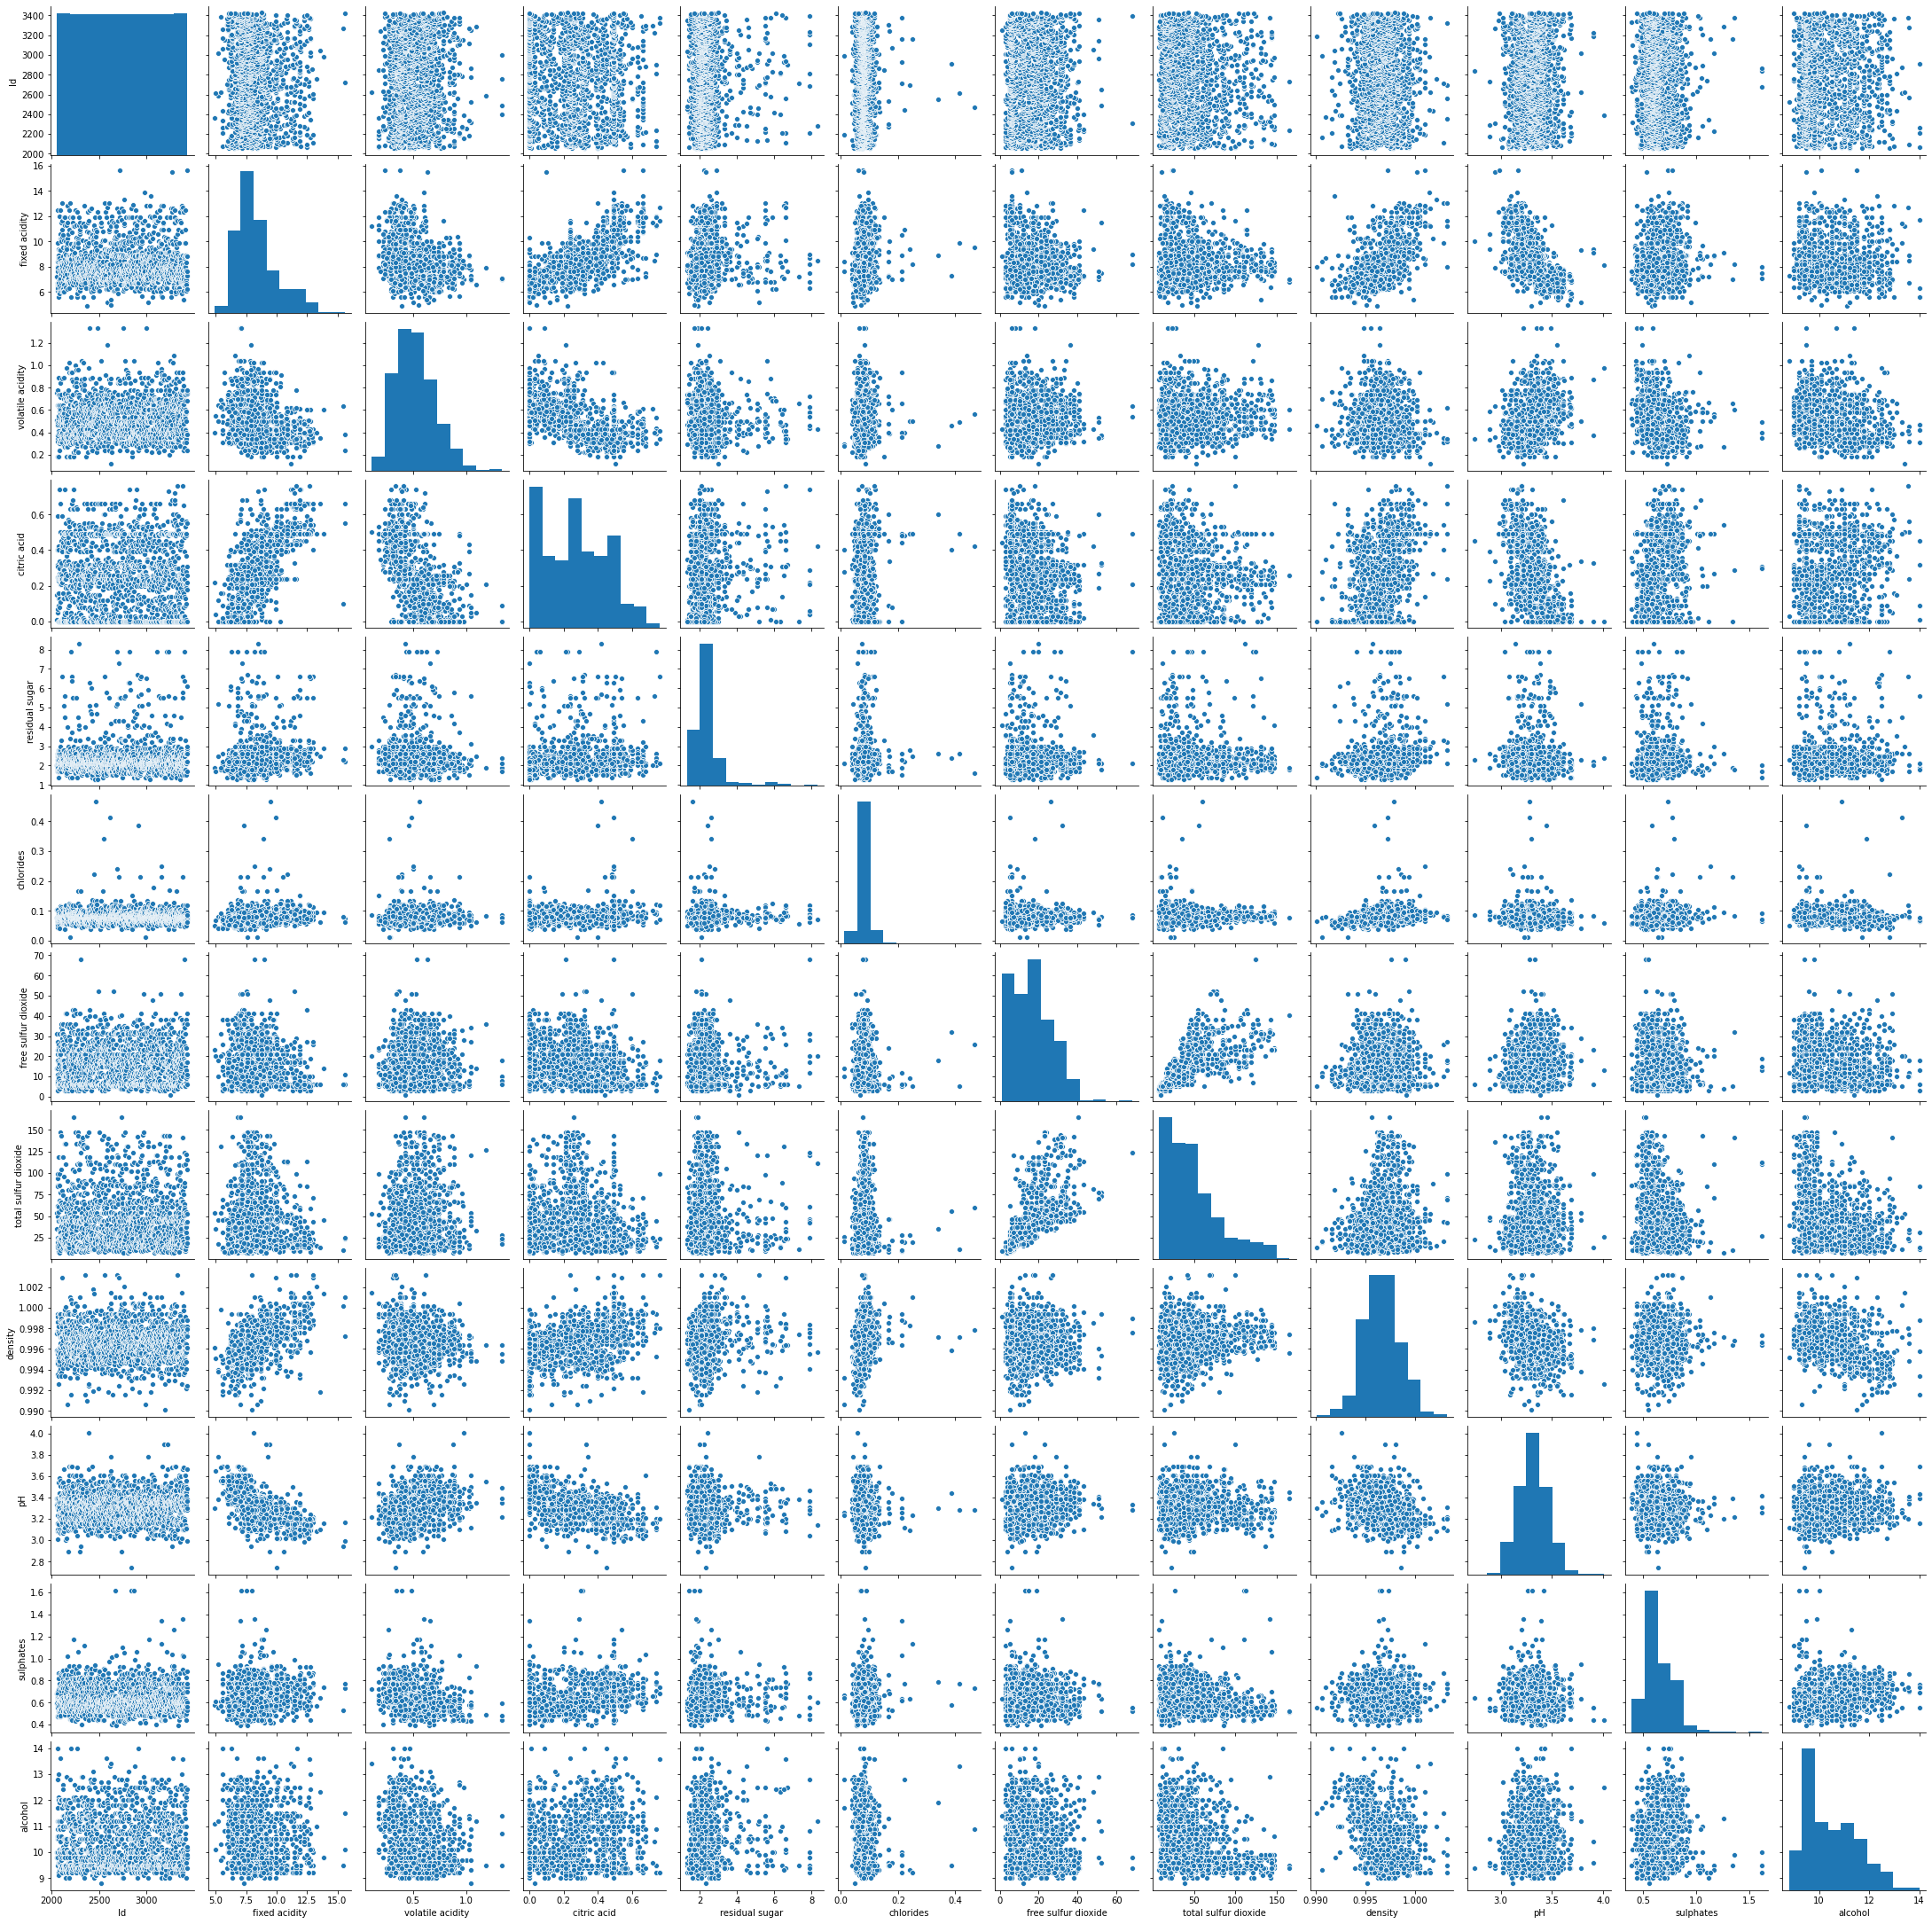

In [42]:
sns.pairplot(df2)

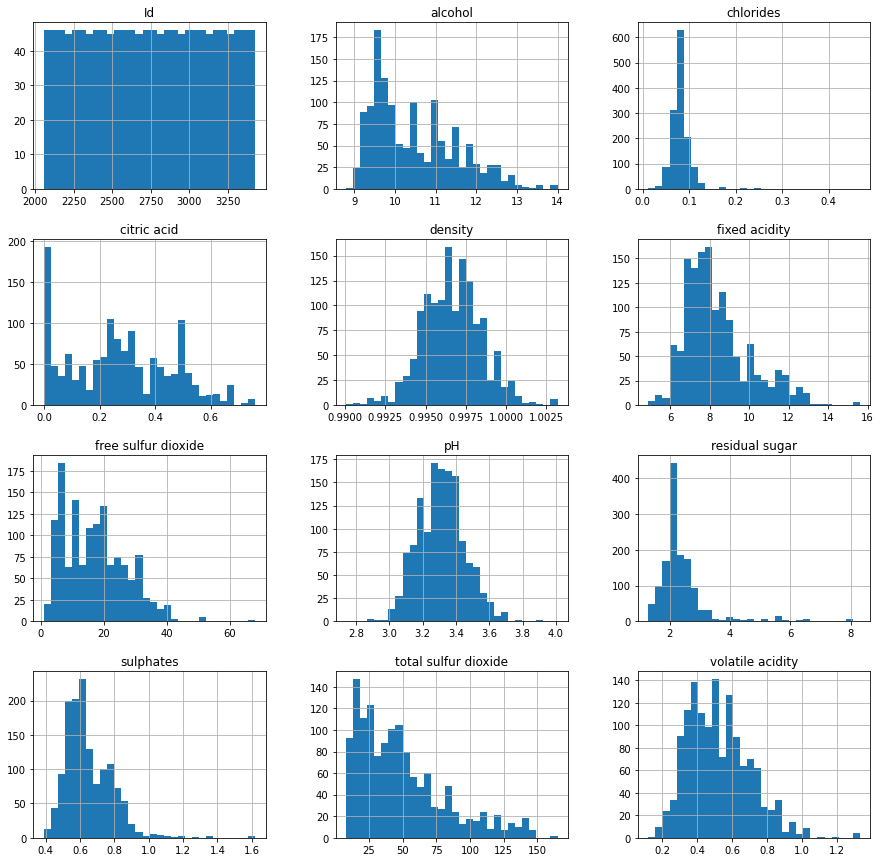

In [43]:
df2.hist(bins=30, figsize=(15,15))
plt.show()

Checking skewness:-

In [44]:
df2.skew()

Id                      0.000000
fixed acidity           0.998275
volatile acidity        0.751330
citric acid             0.212425
residual sugar          3.186226
chlorides               6.452885
free sulfur dioxide     0.713118
total sulfur dioxide    1.087170
density                 0.106033
pH                      0.269916
sulphates               1.633799
alcohol                 0.721949
dtype: float64

In [45]:
df2["volatile acidity"]=np.log(df2["volatile acidity"])
df2["volatile acidity"].skew()

-0.1984215684513696

In [46]:
q1=df2["residual sugar"].quantile(0.25)
q2=df2["residual sugar"].quantile(0.75)

In [47]:
df2["residual sugar"]=np.where(df2["residual sugar"]<q1,q1,df2["residual sugar"])
df2["residual sugar"]=np.where(df2["residual sugar"]>q2,q2,df2["residual sugar"])

In [48]:
df2["residual sugar"].skew()

0.1889751869728943

In [49]:
q1=df2["chlorides"].quantile(0.25)
q2=df2["chlorides"].quantile(0.75)

In [50]:
df2["chlorides"]=np.where(df2["chlorides"]<q1,q1,df2["chlorides"])
df2["chlorides"]=np.where(df2["chlorides"]>q2,q2,df2["chlorides"])

In [51]:
df2["chlorides"].skew()

0.015300550714791958

In [52]:
df2["total sulfur dioxide"]=np.log(df2["total sulfur dioxide"])
df2["total sulfur dioxide"].skew()

-0.15145018636344987

In [53]:
df2["sulphates"]=np.log(df2["sulphates"])
df2["sulphates"].skew()

0.5836441002668619

In [54]:
df2["alcohol"]=np.log(df2["alcohol"])
df2["alcohol"].skew()

0.5589344589252024

In [55]:
df2["free sulfur dioxide"]=np.log(df2["free sulfur dioxide"])
df2["free sulfur dioxide"].skew()

-0.42006940271528453

In [56]:
df2.skew()

Id                      0.000000
fixed acidity           0.998275
volatile acidity       -0.198422
citric acid             0.212425
residual sugar          0.188975
chlorides               0.015301
free sulfur dioxide    -0.420069
total sulfur dioxide   -0.151450
density                 0.106033
pH                      0.269916
sulphates               0.583644
alcohol                 0.558934
dtype: float64

**Correlation:-**

In [57]:
corr=df2.corr()

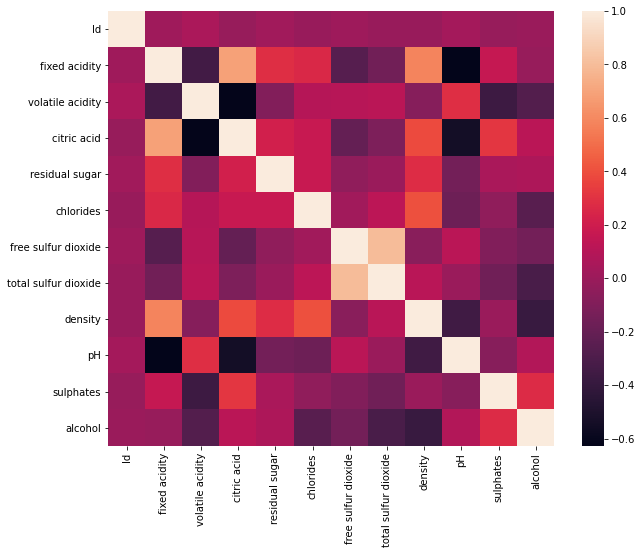

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(corr)
plt.show()

In [59]:
corr

Id  fixed acidity  volatile acidity  citric acid  \
Id                    1.000000       0.014711          0.061315    -0.016568   
fixed acidity         0.014711       1.000000         -0.345623     0.694452   
volatile acidity      0.061315      -0.345623          1.000000    -0.615465   
citric acid          -0.016568       0.694452         -0.615465     1.000000   
residual sugar        0.025718       0.285406         -0.092838     0.218042   
chlorides            -0.010240       0.258636          0.100762     0.168978   
free sulfur dioxide   0.012686      -0.260571          0.104283    -0.201589   
total sulfur dioxide -0.004949      -0.154616          0.122060    -0.107595   
density              -0.004972       0.584905         -0.079232     0.383835   
pH                    0.034436      -0.627488          0.285006    -0.539803   
sulphates            -0.014864       0.163823         -0.365708     0.317022   
alcohol               0.001702      -0.012998         -0.272052     0.116525   

                      residual sugar  chlorides  free sulfur dioxide  \
Id                          0.025718  -0.010240             0.012686   
fixed acidity               0.285406   0.258636            -0.260571   
volatile acidity           -0.092838   0.100762             0.104283   
citric acid                 0.218042   0.168978            -0.201589   
residual sugar              1.000000   0.170702            -0.039286   
chlorides                   0.170702   1.000000             0.022098   
free sulfur dioxide        -0.039286   0.022098             1.000000   
total sulfur dioxide       -0.000686   0.125064             0.800248   
density                     0.279365   0.408651            -0.066752   
pH                         -0.150572  -0.175569             0.120775   
sulphates                   0.053518  -0.037271            -0.093749   
alcohol                     0.069780  -0.256686            -0.145766   

                      total sulfur dioxide   density        pH  sulphates  \
Id                               -0.004949 -0.004972  0.034436  -0.014864   
fixed acidity                    -0.154616  0.584905 -0.627488   0.163823   
volatile acidity                  0.122060 -0.079232  0.285006  -0.365708   
citric acid                      -0.107595  0.383835 -0.539803   0.317022   
residual sugar                   -0.000686  0.279365 -0.150572   0.053518   
chlorides                         0.125064  0.408651 -0.175569  -0.037271   
free sulfur dioxide               0.800248 -0.066752  0.120775  -0.093749   
total sulfur dioxide              1.000000  0.110664 -0.001829  -0.157739   
density                           0.110664  1.000000 -0.351868  -0.000136   
pH                               -0.001829 -0.351868  1.000000  -0.070222   
sulphates                        -0.157739 -0.000136 -0.070222   1.000000   
alcohol                          -0.310976 -0.384980  0.090030   0.272060   

                       alcohol  
Id                    0.001702  
fixed acidity        -0.012998  
volatile acidity     -0.272052  
citric acid           0.116525  
residual sugar        0.069780  
chlorides            -0.256686  
free sulfur dioxide  -0.145766  
total sulfur dioxide -0.310976  
density              -0.384980  
pH                    0.090030  
sulphates             0.272060  
alcohol               1.000000

**Preparing the test dataset:-**

In [60]:
test=df2.copy()

In [61]:
test.head()

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  2056            7.2         -0.673345         0.01             2.0   
1  2057            7.2         -0.281038         0.15             2.0   
2  2058            8.4         -0.776529         0.40             2.0   
3  2059            8.0         -0.755023         0.40             2.0   
4  2060            6.5         -1.078810         0.32             2.1   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.077             3.433987              3.988984  0.99748  3.39   
1      0.087             2.639057              3.555348  0.99586  3.33   
2      0.070             3.044522              3.912023  0.99774  3.08   
3      0.070             2.639057              3.218876  0.99480  3.30   
4      0.070             2.079442              4.543295  0.99356  3.23   

   sulphates   alcohol  
0  -0.527633  2.282382  
1  -0.385662  2.302585  
2  -0.430783  2.251292  
3  -0.430783  2.459589  
4  -0.733969  2.549445

Removing the irrelevant `id` column:

In [62]:
test.drop('Id', axis=1, inplace=True)
test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.2         -0.673345         0.01             2.0      0.077   
1            7.2         -0.281038         0.15             2.0      0.087   
2            8.4         -0.776529         0.40             2.0      0.070   
3            8.0         -0.755023         0.40             2.0      0.070   
4            6.5         -1.078810         0.32             2.1      0.070   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             3.433987              3.988984  0.99748  3.39  -0.527633   
1             2.639057              3.555348  0.99586  3.33  -0.385662   
2             3.044522              3.912023  0.99774  3.08  -0.430783   
3             2.639057              3.218876  0.99480  3.30  -0.430783   
4             2.079442              4.543295  0.99356  3.23  -0.733969   

    alcohol  
0  2.282382  
1  2.302585  
2  2.251292  
3  2.459589  
4  2.549445

## 3. Models:

Here I will use four models:
1. Random Forest model
2. XGBoost Model
3. LightGBM model
4. Catboost model

Now, since the aim is to do an ordinal regression, which is same as a multi-class classification, I will use classifier models. I will use a 5-fold Cross Validation procedure for each of the models.

The evaluation metric is **Quadratic Weighted Kappa** score.

In [63]:
colors = sns.cubehelix_palette()

### 3.1 Random Forest Classifier:-

Fold : 1
Score : 0.4358300676879231
Fold : 2
Score : 0.4677272363897993
Fold : 3
Score : 0.44443670919122125
Fold : 4
Score : 0.40664536037028876
Fold : 5
Score : 0.40972022749468595
Score over 5-folds: 0.43287192022678367


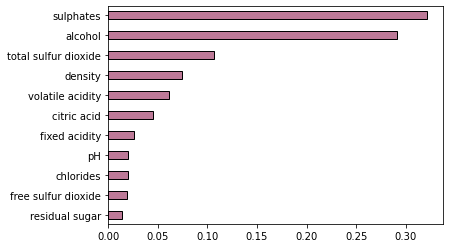

In [64]:
rf_cv_scores = []
rf_importances = []

kf = KFold(n_splits = 5, random_state = 2, shuffle = True)

for fold, (train_id, valid_id) in enumerate(kf.split(X, y)):
    
    ## Splitting train and validation data:
    X_train, X_valid = X.iloc[train_id], X.iloc[valid_id]
    y_train, y_valid = y.iloc[train_id], y.iloc[valid_id]
    
    ## Model:
    model = RandomForestClassifier(random_state = 2, max_depth = 4)
    
    ## Fitting the model:
    model.fit(X_train, y_train)
    
    ## Importances:
    rf_importances.append(model.feature_importances_)
    
    ## Prediction and evaluation:
    rf_pred = model.predict(X_valid)
    score = cohen_kappa_score(y_valid, rf_pred, weights = 'quadratic')
    rf_cv_scores.append(score)
    
    print(f'Fold : {(fold % 5 + 1)}')
    print(f'Score : {rf_cv_scores[-1]}')
    
## Importances:
df_importances = pd.DataFrame(rf_importances, columns = X.columns).apply(np.mean, axis=0).sort_values()
df_importances.plot(kind='barh', align='center', width=0.4, color=colors[2], edgecolor='black')

## Total score:
print(f'Score over 5-folds: {np.mean(rf_cv_scores)}')  



### 3.2 XGBoost Classifier:-

Fold : 1
Score : 0.5331889463762884
Fold : 2
Score : 0.5250487285928969
Fold : 3
Score : 0.5424070035231138
Fold : 4
Score : 0.49084045417300715
Fold : 5
Score : 0.4974598308850121
Score over 5-folds: 0.5177889927100636


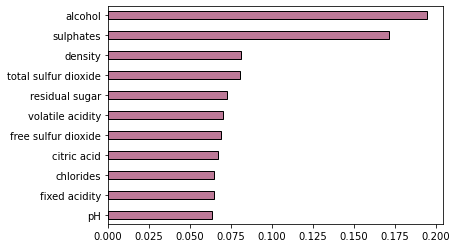

In [65]:
xgb_cv_scores = []
xgb_importances = []

kf = KFold(n_splits = 5, random_state = 2, shuffle = True)

for fold, (train_id, valid_id) in enumerate(kf.split(X, y)):
    
    ## Splitting train and validation data:
    X_train, X_valid = X.iloc[train_id], X.iloc[valid_id]
    y_train, y_valid = y.iloc[train_id], y.iloc[valid_id]
    
    ## Model:
    model = XGBClassifier(objective = 'multi:softmax',
                          num_class = 6,
                          random_state = 2,
                          max_depth = 4,
                          n_estimators = 500,
                          learning_rate = 0.01,
                          subsample = 0.7,
                          colsample_bytree = 0.7)
    
    ## Fitting the model:
    model.fit(X_train, y_train)
    
    ## Importances:
    xgb_importances.append(model.feature_importances_)
    
    ## Prediction and evaluation:
    xgb_pred = model.predict(X_valid)
    score = cohen_kappa_score(y_valid, xgb_pred, weights = 'quadratic')
    xgb_cv_scores.append(score)
    
    print(f'Fold : {(fold % 5 + 1)}')
    print(f'Score : {xgb_cv_scores[-1]}')
    
## Importances:
df_importances = pd.DataFrame(xgb_importances, columns = X.columns).apply(np.mean, axis=0).sort_values()
df_importances.plot(kind='barh', align='center', width=0.4, color=colors[2], edgecolor='black')

## Total score:
print(f'Score over 5-folds: {np.mean(xgb_cv_scores)}') 

### 3.3 LightGBM Classifier:

Fold : 1
Score : 0.5216267517466984
Fold : 2
Score : 0.5298284045271997
Fold : 3
Score : 0.543036962132303
Fold : 4
Score : 0.5037468616440194
Fold : 5
Score : 0.4710424710424711
Score over 5-folds: 0.5138562902185383


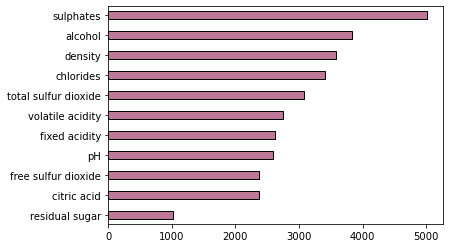

In [66]:
lgb_cv_scores = []
lgb_importances = []

kf = KFold(n_splits = 5, random_state = 2, shuffle = True)

for fold, (train_id, valid_id) in enumerate(kf.split(X, y)):
    
    ## Splitting train and validation data:
    X_train, X_valid = X.iloc[train_id], X.iloc[valid_id]
    y_train, y_valid = y.iloc[train_id], y.iloc[valid_id]
    
    ## Model:
    model = LGBMClassifier(objective = 'multiclass',
                          num_class = 6,
                          random_state = 2,
                          max_depth = 4,
                          n_estimators = 500,
                          learning_rate = 0.01,
                          subsample = 0.7,
                          colsample_bytree = 0.7)
    
    ## Fitting the model:
    model.fit(X_train, y_train)
    
    ## Importances:
    lgb_importances.append(model.feature_importances_)
    
    ## Prediction and evaluation:
    lgb_pred = model.predict(X_valid)
    score = cohen_kappa_score(y_valid, lgb_pred, weights = 'quadratic')
    lgb_cv_scores.append(score)
    
    print(f'Fold : {(fold % 5 + 1)}')
    print(f'Score : {lgb_cv_scores[-1]}')
    
## Importances:
df_importances = pd.DataFrame(lgb_importances, columns = X.columns).apply(np.mean, axis=0).sort_values()
df_importances.plot(kind='barh', align='center', width=0.4, color=colors[2], edgecolor='black')

## Total score:
print(f'Score over 5-folds: {np.mean(lgb_cv_scores)}') 

### 3.4 CatBoost Classifier:

0:	learn: 1.7772855	total: 147ms	remaining: 1m 13s
1:	learn: 1.7633304	total: 150ms	remaining: 37.3s
2:	learn: 1.7495249	total: 152ms	remaining: 25.3s
3:	learn: 1.7359189	total: 155ms	remaining: 19.3s
4:	learn: 1.7242511	total: 158ms	remaining: 15.6s
5:	learn: 1.7117753	total: 160ms	remaining: 13.2s
6:	learn: 1.6999269	total: 163ms	remaining: 11.5s
7:	learn: 1.6883606	total: 165ms	remaining: 10.1s
8:	learn: 1.6779414	total: 167ms	remaining: 9.11s
9:	learn: 1.6674388	total: 169ms	remaining: 8.3s
10:	learn: 1.6562408	total: 172ms	remaining: 7.64s
11:	learn: 1.6451734	total: 174ms	remaining: 7.09s
12:	learn: 1.6351422	total: 177ms	remaining: 6.63s
13:	learn: 1.6255141	total: 180ms	remaining: 6.24s
14:	learn: 1.6155241	total: 183ms	remaining: 5.92s
15:	learn: 1.6067258	total: 187ms	remaining: 5.66s
16:	learn: 1.5972501	total: 191ms	remaining: 5.42s
17:	learn: 1.5877065	total: 194ms	remaining: 5.21s
18:	learn: 1.5787324	total: 198ms	remaining: 5.01s
19:	learn: 1.5697041	total: 202ms	remaini

176:	learn: 1.0628582	total: 776ms	remaining: 1.42s
177:	learn: 1.0619432	total: 779ms	remaining: 1.41s
178:	learn: 1.0610102	total: 782ms	remaining: 1.4s
179:	learn: 1.0599692	total: 785ms	remaining: 1.39s
180:	learn: 1.0588995	total: 788ms	remaining: 1.39s
181:	learn: 1.0578242	total: 790ms	remaining: 1.38s
182:	learn: 1.0569669	total: 794ms	remaining: 1.38s
183:	learn: 1.0559724	total: 800ms	remaining: 1.37s
184:	learn: 1.0549126	total: 802ms	remaining: 1.36s
185:	learn: 1.0540819	total: 805ms	remaining: 1.36s
186:	learn: 1.0531895	total: 807ms	remaining: 1.35s
187:	learn: 1.0522629	total: 811ms	remaining: 1.34s
188:	learn: 1.0513295	total: 814ms	remaining: 1.34s
189:	learn: 1.0503739	total: 818ms	remaining: 1.33s
190:	learn: 1.0494435	total: 821ms	remaining: 1.33s
191:	learn: 1.0485569	total: 824ms	remaining: 1.32s
192:	learn: 1.0477356	total: 827ms	remaining: 1.31s
193:	learn: 1.0470043	total: 830ms	remaining: 1.31s
194:	learn: 1.0461194	total: 833ms	remaining: 1.3s
195:	learn: 1.

340:	learn: 0.9739057	total: 1.41s	remaining: 659ms
341:	learn: 0.9736688	total: 1.42s	remaining: 658ms
342:	learn: 0.9734267	total: 1.43s	remaining: 654ms
343:	learn: 0.9732526	total: 1.44s	remaining: 653ms
344:	learn: 0.9730180	total: 1.45s	remaining: 649ms
345:	learn: 0.9726459	total: 1.45s	remaining: 646ms
346:	learn: 0.9723903	total: 1.46s	remaining: 642ms
347:	learn: 0.9720876	total: 1.47s	remaining: 640ms
348:	learn: 0.9718438	total: 1.48s	remaining: 640ms
349:	learn: 0.9715773	total: 1.48s	remaining: 636ms
350:	learn: 0.9713182	total: 1.49s	remaining: 634ms
351:	learn: 0.9711379	total: 1.5s	remaining: 630ms
352:	learn: 0.9708128	total: 1.51s	remaining: 627ms
353:	learn: 0.9705766	total: 1.51s	remaining: 624ms
354:	learn: 0.9702733	total: 1.52s	remaining: 620ms
355:	learn: 0.9700872	total: 1.52s	remaining: 617ms
356:	learn: 0.9698037	total: 1.54s	remaining: 616ms
357:	learn: 0.9695832	total: 1.54s	remaining: 611ms
358:	learn: 0.9692812	total: 1.55s	remaining: 609ms
359:	learn: 0

0:	learn: 1.7785406	total: 15.8ms	remaining: 7.9s
1:	learn: 1.7642807	total: 24.9ms	remaining: 6.19s
2:	learn: 1.7518737	total: 30.6ms	remaining: 5.07s
3:	learn: 1.7377738	total: 36.5ms	remaining: 4.52s
4:	learn: 1.7257988	total: 42.9ms	remaining: 4.24s
5:	learn: 1.7134504	total: 53.4ms	remaining: 4.39s
6:	learn: 1.7017440	total: 58.1ms	remaining: 4.09s
7:	learn: 1.6895634	total: 62.1ms	remaining: 3.82s
8:	learn: 1.6775533	total: 66.8ms	remaining: 3.65s
9:	learn: 1.6668127	total: 74.6ms	remaining: 3.66s
10:	learn: 1.6554781	total: 81.5ms	remaining: 3.62s
11:	learn: 1.6455686	total: 87.9ms	remaining: 3.57s
12:	learn: 1.6351120	total: 95.2ms	remaining: 3.56s
13:	learn: 1.6252949	total: 102ms	remaining: 3.56s
14:	learn: 1.6148396	total: 108ms	remaining: 3.49s
15:	learn: 1.6052431	total: 113ms	remaining: 3.42s
16:	learn: 1.5961106	total: 118ms	remaining: 3.34s
17:	learn: 1.5864477	total: 123ms	remaining: 3.29s
18:	learn: 1.5777063	total: 130ms	remaining: 3.3s
19:	learn: 1.5681849	total: 13

179:	learn: 1.0513207	total: 806ms	remaining: 1.43s
180:	learn: 1.0502739	total: 809ms	remaining: 1.43s
181:	learn: 1.0492103	total: 812ms	remaining: 1.42s
182:	learn: 1.0484137	total: 815ms	remaining: 1.41s
183:	learn: 1.0473239	total: 818ms	remaining: 1.4s
184:	learn: 1.0463854	total: 821ms	remaining: 1.4s
185:	learn: 1.0455467	total: 824ms	remaining: 1.39s
186:	learn: 1.0446347	total: 829ms	remaining: 1.39s
187:	learn: 1.0437735	total: 832ms	remaining: 1.38s
188:	learn: 1.0428607	total: 835ms	remaining: 1.37s
189:	learn: 1.0419195	total: 838ms	remaining: 1.37s
190:	learn: 1.0410769	total: 841ms	remaining: 1.36s
191:	learn: 1.0402754	total: 844ms	remaining: 1.35s
192:	learn: 1.0394862	total: 848ms	remaining: 1.35s
193:	learn: 1.0385219	total: 852ms	remaining: 1.34s
194:	learn: 1.0376435	total: 855ms	remaining: 1.34s
195:	learn: 1.0367439	total: 858ms	remaining: 1.33s
196:	learn: 1.0360658	total: 862ms	remaining: 1.33s
197:	learn: 1.0351831	total: 866ms	remaining: 1.32s
198:	learn: 1.

348:	learn: 0.9650843	total: 1.61s	remaining: 698ms
349:	learn: 0.9648173	total: 1.62s	remaining: 694ms
350:	learn: 0.9644690	total: 1.63s	remaining: 694ms
351:	learn: 0.9641578	total: 1.64s	remaining: 689ms
352:	learn: 0.9638236	total: 1.65s	remaining: 687ms
353:	learn: 0.9635674	total: 1.65s	remaining: 682ms
354:	learn: 0.9632567	total: 1.67s	remaining: 680ms
355:	learn: 0.9631043	total: 1.67s	remaining: 677ms
356:	learn: 0.9628130	total: 1.68s	remaining: 673ms
357:	learn: 0.9626290	total: 1.69s	remaining: 670ms
358:	learn: 0.9624267	total: 1.69s	remaining: 665ms
359:	learn: 0.9621143	total: 1.7s	remaining: 661ms
360:	learn: 0.9619359	total: 1.71s	remaining: 657ms
361:	learn: 0.9616538	total: 1.71s	remaining: 651ms
362:	learn: 0.9613382	total: 1.72s	remaining: 647ms
363:	learn: 0.9610019	total: 1.72s	remaining: 642ms
364:	learn: 0.9608447	total: 1.72s	remaining: 637ms
365:	learn: 0.9605903	total: 1.73s	remaining: 632ms
366:	learn: 0.9603545	total: 1.73s	remaining: 628ms
367:	learn: 0

15:	learn: 1.6111401	total: 73.5ms	remaining: 2.22s
16:	learn: 1.6023068	total: 76.6ms	remaining: 2.18s
17:	learn: 1.5929820	total: 83ms	remaining: 2.22s
18:	learn: 1.5841347	total: 86.5ms	remaining: 2.19s
19:	learn: 1.5747841	total: 89.9ms	remaining: 2.16s
20:	learn: 1.5656240	total: 96.4ms	remaining: 2.2s
21:	learn: 1.5569837	total: 99.7ms	remaining: 2.17s
22:	learn: 1.5489580	total: 102ms	remaining: 2.12s
23:	learn: 1.5400280	total: 106ms	remaining: 2.09s
24:	learn: 1.5319232	total: 111ms	remaining: 2.1s
25:	learn: 1.5236366	total: 113ms	remaining: 2.07s
26:	learn: 1.5160215	total: 117ms	remaining: 2.04s
27:	learn: 1.5084267	total: 123ms	remaining: 2.08s
28:	learn: 1.5015048	total: 127ms	remaining: 2.06s
29:	learn: 1.4936955	total: 130ms	remaining: 2.04s
30:	learn: 1.4866778	total: 136ms	remaining: 2.05s
31:	learn: 1.4795455	total: 139ms	remaining: 2.04s
32:	learn: 1.4725614	total: 142ms	remaining: 2.01s
33:	learn: 1.4660699	total: 145ms	remaining: 1.99s
34:	learn: 1.4590770	total: 

197:	learn: 1.0521502	total: 850ms	remaining: 1.3s
198:	learn: 1.0514505	total: 858ms	remaining: 1.3s
199:	learn: 1.0507050	total: 862ms	remaining: 1.29s
200:	learn: 1.0499642	total: 865ms	remaining: 1.29s
201:	learn: 1.0491904	total: 871ms	remaining: 1.28s
202:	learn: 1.0484152	total: 874ms	remaining: 1.28s
203:	learn: 1.0476299	total: 877ms	remaining: 1.27s
204:	learn: 1.0470568	total: 880ms	remaining: 1.26s
205:	learn: 1.0464151	total: 886ms	remaining: 1.26s
206:	learn: 1.0456411	total: 889ms	remaining: 1.26s
207:	learn: 1.0448518	total: 891ms	remaining: 1.25s
208:	learn: 1.0440995	total: 895ms	remaining: 1.25s
209:	learn: 1.0434860	total: 899ms	remaining: 1.24s
210:	learn: 1.0427511	total: 902ms	remaining: 1.24s
211:	learn: 1.0419647	total: 905ms	remaining: 1.23s
212:	learn: 1.0412278	total: 908ms	remaining: 1.22s
213:	learn: 1.0404308	total: 912ms	remaining: 1.22s
214:	learn: 1.0396883	total: 915ms	remaining: 1.21s
215:	learn: 1.0389976	total: 919ms	remaining: 1.21s
216:	learn: 1.

368:	learn: 0.9775820	total: 1.63s	remaining: 578ms
369:	learn: 0.9773485	total: 1.63s	remaining: 573ms
370:	learn: 0.9771962	total: 1.63s	remaining: 568ms
371:	learn: 0.9770556	total: 1.64s	remaining: 563ms
372:	learn: 0.9768678	total: 1.64s	remaining: 559ms
373:	learn: 0.9766298	total: 1.64s	remaining: 554ms
374:	learn: 0.9763612	total: 1.65s	remaining: 549ms
375:	learn: 0.9761946	total: 1.65s	remaining: 544ms
376:	learn: 0.9760008	total: 1.65s	remaining: 540ms
377:	learn: 0.9758849	total: 1.66s	remaining: 535ms
378:	learn: 0.9755907	total: 1.66s	remaining: 530ms
379:	learn: 0.9754261	total: 1.66s	remaining: 525ms
380:	learn: 0.9752058	total: 1.67s	remaining: 521ms
381:	learn: 0.9749680	total: 1.67s	remaining: 516ms
382:	learn: 0.9747576	total: 1.67s	remaining: 511ms
383:	learn: 0.9746009	total: 1.68s	remaining: 506ms
384:	learn: 0.9743168	total: 1.68s	remaining: 502ms
385:	learn: 0.9740042	total: 1.68s	remaining: 497ms
386:	learn: 0.9737600	total: 1.69s	remaining: 492ms
387:	learn: 

53:	learn: 1.3446948	total: 198ms	remaining: 1.64s
54:	learn: 1.3399031	total: 201ms	remaining: 1.63s
55:	learn: 1.3349403	total: 204ms	remaining: 1.61s
56:	learn: 1.3302453	total: 208ms	remaining: 1.61s
57:	learn: 1.3257107	total: 212ms	remaining: 1.62s
58:	learn: 1.3209795	total: 216ms	remaining: 1.61s
59:	learn: 1.3163376	total: 219ms	remaining: 1.6s
60:	learn: 1.3123588	total: 225ms	remaining: 1.62s
61:	learn: 1.3083464	total: 228ms	remaining: 1.61s
62:	learn: 1.3050154	total: 231ms	remaining: 1.6s
63:	learn: 1.3005538	total: 236ms	remaining: 1.61s
64:	learn: 1.2966905	total: 240ms	remaining: 1.6s
65:	learn: 1.2928954	total: 243ms	remaining: 1.6s
66:	learn: 1.2888685	total: 246ms	remaining: 1.59s
67:	learn: 1.2846542	total: 252ms	remaining: 1.6s
68:	learn: 1.2807785	total: 255ms	remaining: 1.59s
69:	learn: 1.2768973	total: 258ms	remaining: 1.59s
70:	learn: 1.2731782	total: 263ms	remaining: 1.59s
71:	learn: 1.2693004	total: 266ms	remaining: 1.58s
72:	learn: 1.2656105	total: 270ms	re

247:	learn: 1.0045553	total: 965ms	remaining: 981ms
248:	learn: 1.0039294	total: 969ms	remaining: 977ms
249:	learn: 1.0033275	total: 973ms	remaining: 973ms
250:	learn: 1.0027769	total: 976ms	remaining: 969ms
251:	learn: 1.0022899	total: 980ms	remaining: 964ms
252:	learn: 1.0018042	total: 984ms	remaining: 961ms
253:	learn: 1.0012815	total: 989ms	remaining: 958ms
254:	learn: 1.0007791	total: 992ms	remaining: 953ms
255:	learn: 1.0001598	total: 995ms	remaining: 948ms
256:	learn: 0.9997754	total: 998ms	remaining: 943ms
257:	learn: 0.9993077	total: 1s	remaining: 939ms
258:	learn: 0.9988284	total: 1s	remaining: 934ms
259:	learn: 0.9984842	total: 1.01s	remaining: 929ms
260:	learn: 0.9979991	total: 1.01s	remaining: 924ms
261:	learn: 0.9974303	total: 1.01s	remaining: 919ms
262:	learn: 0.9969728	total: 1.01s	remaining: 915ms
263:	learn: 0.9964076	total: 1.02s	remaining: 910ms
264:	learn: 0.9959623	total: 1.02s	remaining: 905ms
265:	learn: 0.9954574	total: 1.02s	remaining: 900ms
266:	learn: 0.9950

447:	learn: 0.9454158	total: 1.74s	remaining: 202ms
448:	learn: 0.9452618	total: 1.74s	remaining: 198ms
449:	learn: 0.9450663	total: 1.75s	remaining: 194ms
450:	learn: 0.9449006	total: 1.75s	remaining: 190ms
451:	learn: 0.9446336	total: 1.75s	remaining: 186ms
452:	learn: 0.9444285	total: 1.75s	remaining: 182ms
453:	learn: 0.9441631	total: 1.76s	remaining: 178ms
454:	learn: 0.9440142	total: 1.76s	remaining: 174ms
455:	learn: 0.9439074	total: 1.76s	remaining: 170ms
456:	learn: 0.9437705	total: 1.76s	remaining: 166ms
457:	learn: 0.9435544	total: 1.77s	remaining: 162ms
458:	learn: 0.9434045	total: 1.77s	remaining: 158ms
459:	learn: 0.9432670	total: 1.77s	remaining: 154ms
460:	learn: 0.9431479	total: 1.77s	remaining: 150ms
461:	learn: 0.9429858	total: 1.78s	remaining: 146ms
462:	learn: 0.9427765	total: 1.78s	remaining: 142ms
463:	learn: 0.9425738	total: 1.78s	remaining: 138ms
464:	learn: 0.9423681	total: 1.78s	remaining: 134ms
465:	learn: 0.9421540	total: 1.78s	remaining: 130ms
466:	learn: 

129:	learn: 1.1324185	total: 581ms	remaining: 1.65s
130:	learn: 1.1307638	total: 590ms	remaining: 1.66s
131:	learn: 1.1290227	total: 594ms	remaining: 1.65s
132:	learn: 1.1276524	total: 603ms	remaining: 1.66s
133:	learn: 1.1260171	total: 608ms	remaining: 1.66s
134:	learn: 1.1244170	total: 616ms	remaining: 1.67s
135:	learn: 1.1226466	total: 619ms	remaining: 1.66s
136:	learn: 1.1211292	total: 623ms	remaining: 1.65s
137:	learn: 1.1195728	total: 629ms	remaining: 1.65s
138:	learn: 1.1180233	total: 633ms	remaining: 1.64s
139:	learn: 1.1165627	total: 636ms	remaining: 1.63s
140:	learn: 1.1153371	total: 642ms	remaining: 1.63s
141:	learn: 1.1138647	total: 647ms	remaining: 1.63s
142:	learn: 1.1122442	total: 650ms	remaining: 1.62s
143:	learn: 1.1107338	total: 656ms	remaining: 1.62s
144:	learn: 1.1094229	total: 659ms	remaining: 1.61s
145:	learn: 1.1080626	total: 663ms	remaining: 1.61s
146:	learn: 1.1065157	total: 666ms	remaining: 1.6s
147:	learn: 1.1049983	total: 671ms	remaining: 1.6s
148:	learn: 1.

314:	learn: 0.9951893	total: 1.52s	remaining: 892ms
315:	learn: 0.9948419	total: 1.52s	remaining: 886ms
316:	learn: 0.9945028	total: 1.52s	remaining: 881ms
317:	learn: 0.9942862	total: 1.53s	remaining: 875ms
318:	learn: 0.9939003	total: 1.53s	remaining: 870ms
319:	learn: 0.9935756	total: 1.54s	remaining: 864ms
320:	learn: 0.9932290	total: 1.54s	remaining: 859ms
321:	learn: 0.9929946	total: 1.54s	remaining: 854ms
322:	learn: 0.9927489	total: 1.55s	remaining: 848ms
323:	learn: 0.9923637	total: 1.55s	remaining: 842ms
324:	learn: 0.9920249	total: 1.55s	remaining: 837ms
325:	learn: 0.9917096	total: 1.56s	remaining: 831ms
326:	learn: 0.9915388	total: 1.56s	remaining: 825ms
327:	learn: 0.9912096	total: 1.56s	remaining: 820ms
328:	learn: 0.9908240	total: 1.57s	remaining: 815ms
329:	learn: 0.9906473	total: 1.57s	remaining: 809ms
330:	learn: 0.9903249	total: 1.57s	remaining: 803ms
331:	learn: 0.9900441	total: 1.58s	remaining: 798ms
332:	learn: 0.9897023	total: 1.58s	remaining: 793ms
333:	learn: 

487:	learn: 0.9554212	total: 2.14s	remaining: 52.7ms
488:	learn: 0.9553016	total: 2.14s	remaining: 48.2ms
489:	learn: 0.9551118	total: 2.15s	remaining: 43.9ms
490:	learn: 0.9550043	total: 2.15s	remaining: 39.5ms
491:	learn: 0.9548944	total: 2.16s	remaining: 35.1ms
492:	learn: 0.9547716	total: 2.16s	remaining: 30.7ms
493:	learn: 0.9545996	total: 2.17s	remaining: 26.3ms
494:	learn: 0.9543867	total: 2.17s	remaining: 21.9ms
495:	learn: 0.9542112	total: 2.17s	remaining: 17.5ms
496:	learn: 0.9540306	total: 2.17s	remaining: 13.1ms
497:	learn: 0.9539230	total: 2.18s	remaining: 8.74ms
498:	learn: 0.9536470	total: 2.18s	remaining: 4.37ms
499:	learn: 0.9534807	total: 2.18s	remaining: 0us
Fold : 5
Score : 0.473522775349034
Score over 5-folds: 0.49496352423275736


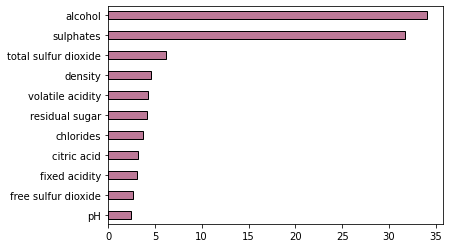

In [67]:
cat_cv_scores = []
cat_importances = []

kf = KFold(n_splits = 5, random_state = 2, shuffle = True)

for fold, (train_id, valid_id) in enumerate(kf.split(X, y)):
    
    ## Splitting train and validation data:
    X_train, X_valid = X.iloc[train_id], X.iloc[valid_id]
    y_train, y_valid = y.iloc[train_id], y.iloc[valid_id]
    
    ## Model:
    model = CatBoostClassifier(loss_function = 'MultiClass',
                               max_depth = 4,
                               learning_rate = 0.01,
                               n_estimators = 500)
    
    ## Fitting the model:
    model.fit(X_train, y_train)
    
    ## Importances:
    cat_importances.append(model.feature_importances_)
    
    ## Prediction and evaluation:
    cat_pred = model.predict(X_valid)
    score = cohen_kappa_score(y_valid, cat_pred, weights = 'quadratic')
    cat_cv_scores.append(score)
    
    print(f'Fold : {(fold % 5 + 1)}')
    print(f'Score : {cat_cv_scores[-1]}')
    
## Importances:
df_importances = pd.DataFrame(cat_importances, columns = X.columns).apply(np.mean, axis=0).sort_values()
df_importances.plot(kind='barh', align='center', width=0.4, color=colors[2], edgecolor='black')

## Total score:
print(f'Score over 5-folds: {np.mean(cat_cv_scores)}') 

## 4. Final Prediction:-

So, I see that the XGBoost Classifier model gives the best result. Thus I will train the entire train data with the XGBoost Classifier model and use it to make predictions on the test set.

In [68]:
## Final model
final_model = XGBClassifier(objective = 'multi:softmax',
                            num_class = 6,
                            random_state = 2,
                            max_depth = 4,
                            n_estimators = 500,
                            learning_rate = 0.01,
                            subsample = 0.7,
                            colsample_bytree = 0.7)
## Training the final model:
final_model.fit(X, y)

## Model predictions:
final_pred = final_model.predict(test)

## 5. Submission:-

In [69]:
submission = pd.read_csv("sample_submission.csv")
submission.head()

Id  quality
0  2056        5
1  2057        5
2  2058        5
3  2059        5
4  2060        5

In [70]:
submission['quality'] = final_pred
submission.head()

Id  quality
0  2056        3
1  2057        3
2  2058        3
3  2059        3
4  2060        4

In [71]:
submission['quality'] = le.inverse_transform(submission['quality'])
submission.head()

Id  quality
0  2056        6
1  2057        6
2  2058        6
3  2059        6
4  2060        7

In [72]:
submission.to_csv('final_submission.csv')